<a href="https://colab.research.google.com/github/AhmedAboushanab/Free-Work/blob/main/Genetic_Risk_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import statsmodels.api as sm
import numpy as np
from collections import Counter
import math
from itertools import islice

**Loading the data**

In [ ]:
Data = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genetic_risk_score/genotypes.tsv', sep = '\t')

In [ ]:
Data.head()

,individual_id,rs13266634,rs1801282,rs4402960,rs5219,rs7903146
0,1,CA,AA,AA,TT,AA
1,2,CA,GA,AA,TT,AA
2,3,CC,AA,AA,TT,AA
3,4,AA,GG,AA,TT,TT
4,5,CA,AA,AA,AT,AA


In [ ]:
Allele = list(Data.iloc[1,:])

In [ ]:
Allele

[2, 'CA', 'GA', 'AA', 'TT', 'AA']

In [ ]:
Data['rs13266634'][1]

'CA'

In [ ]:
list(Data['rs13266634'][1])

['C', 'A']

In [ ]:
len(Data.keys())

6

In [ ]:
Data.keys()[1]

'rs13266634'

In [ ]:
Data['individual_id'][1]

2

In [ ]:
type(Data['individual_id'][1])

numpy.int64

In [ ]:
len(Data['individual_id'])

1000

#**Methods**

#This is a function that divides the genotype into 2 bp instead of 1 to be easier for counting the number of risk alleles in another function.

In [ ]:
#This is a function that divides the genotype into 2 bp instead of 1
def allele(j, i:str):
  Data = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genetic_risk_score/genotypes.tsv', sep = '\t')
  while j in Data['individual_id']:
    while i in Data.keys():
      return list(Data[i][j])
    else:
      break

In [ ]:
allele(1, 'rs13266634')

['C', 'A']

In [ ]:
allele(0, 'rs13266634')

['C', 'A']

In [ ]:
type(allele(1, 'rs13266634'))

list

In [ ]:
allele(1, 'rs1801282')

['G', 'A']

#This function counts the Allele Count of the risk alleles in the genotype of each sample through calling the allele function from above.

In [ ]:
#This function counts the Allele Count of the SNPs
def count_SNPs(h:str, j, i):
  SNPs = {}
  if h in allele(j, i):
    SNPs = Counter(allele(j, i))
    return float((SNPs[h]))
  elif h not in allele(j, i):
    return 0.0



In [ ]:
count_SNPs('A', 1, 'rs1801282')

1.0

In [ ]:
type(count_SNPs('A', 1, 'rs1801282'))

float

In [ ]:
(count_SNPs('H', 1, 'rs1801282'))

0.0

#This function detects the risk allele, assign the ODDS, and calculate the ODDS per SNP.

In [ ]:
#This function detects the risk allele and assign the ODDs
def risk_allele(j, i):
  counter = 0
  if i == 'rs7903146':
    r_allele = 'T'
    ODDs_Ratio = 1.4
    #h == r_allele
    Allele_Count = count_SNPs(r_allele, j, i)
    score_contribution = math.log(ODDs_Ratio) * Allele_Count
    return(float(score_contribution))
  elif i == 'rs1801282':
    r_allele = 'G'
    ODDs_Ratio = 1.3
    #h == r_allele
    Allele_Count = count_SNPs(r_allele, j, i)
    score_contribution = math.log(ODDs_Ratio) * Allele_Count
    return(float(score_contribution))
    #print(score_contribution)
  elif i == 'rs5219':
    r_allele = 'A'
    ODDs_Ratio = 1.2
    #h == r_allele
    Allele_Count = count_SNPs(r_allele, j, i)
    score_contribution = math.log(ODDs_Ratio) * Allele_Count
    return(float(score_contribution))
    #print(score_contribution)
  elif i == 'rs4402960':
    r_allele = 'G'
    ODDs_Ratio = 1.5
    #h == r_allele
    Allele_Count = count_SNPs(r_allele, j, i)
    score_contribution = math.log(ODDs_Ratio) * Allele_Count
    return(float(score_contribution))
    #print(score_contribution)
  elif i == 'rs13266634':
    r_allele = 'C'
    ODDs_Ratio = 1.6
    #h == r_allele
    Allele_Count = count_SNPs(r_allele, j, i)
    score_contribution = math.log(ODDs_Ratio) * Allele_Count
    return(float(score_contribution))
    #print(score_contribution)
  elif i == 'individual_id':
    counter = counter + 1
  else:
    print('out of scope')

In [ ]:
risk_allele(1, 'rs1801282')

0.26236426446749106

In [ ]:
risk_allele(1, 'rs13266634')

0.47000362924573563

In [ ]:
risk_allele(2, 'rs13266634')

0.9400072584914713

In [ ]:
type(risk_allele(2, 'rs13266634'))

float

In [ ]:
float(risk_allele(2, 'rs13266634'))

0.9400072584914713

#Now we apply the three functions together in a for loop to separate the alleles in the SNPs in the genotype, count the occurence of risk alleles, calculate their score, then move to the next SNP, then finally calculate the Genetic Risk Score (GRS) per the whole sample.

In [ ]:
score = 0.0
individual_score = {}
j = 1
q = 0
for j in range(1000):
  for i in Data.keys():
    if i == 'individual_id':
      q = q
      j = j
    elif i == 'rs13266634' and q < 4:
      score_contribution_1 = risk_allele(j, i)
      q = q + 1
      j = j
    elif i == 'rs1801282' and q < 4:
      score_contribution_2 = risk_allele(j, i)
      q = q + 1
      j = j
    elif i == 'rs4402960' and q < 4:
      score_contribution_3 = risk_allele(j, i)
      q = q + 1
      j = j
    elif i == 'rs5219' and q < 4:
      score_contribution_4 = risk_allele(j, i)
      q = q + 1
      j = j
    elif i == 'rs7903146' and q < 4:
      score_contribution_5 = risk_allele(j, i)
      q = q + 1
      j = j
    else:
      individual_score[j+1] = score + score_contribution_1 + score_contribution_2 + score_contribution_3 + score_contribution_4 + score_contribution_5
      q = 0
      j = j + 1
      #score_contribution_1 = 0
      #score_contribution_2 = 0
      #score_contribution_3 = 0
      #score_contribution_4 = 0
      #score_contribution_5 = 0

print(individual_score)


{1: 0.47000362924573563, 2: 0.7323678937132267, 3: 0.9400072584914713, 4: 0.5247285289349821, 5: 0.6523251860396903, 6: 0.7323678937132267, 7: 1.1223288152854258, 8: 0.0, 9: 1.0732944806838198, 10: 1.3201545586153458, 11: 1.1378330018213911, 12: 1.0577902941478547, 13: 1.1378330018213911, 14: 0.6523251860396903, 15: 0.26236426446749106, 16: 1.3201545586153458, 17: 0.6270073780554002, 18: 0.1823215567939546, 19: 0.6523251860396903, 20: 1.3046503720793805, 21: 0.7323678937132267, 22: 0.4054651081081644, 23: 0.4054651081081644, 24: 0.0, 25: 0.7323678937132267, 26: 1.1770537149746725, 27: 0.85015092936961, 28: 0.47000362924573563, 29: 0.4446858212614456, 30: 0.26236426446749106, 31: 0.6523251860396903, 32: 1.3454723665996355, 33: 0.26236426446749106, 34: 1.1770537149746725, 35: 1.5179803019452656, 36: 1.2023715229589622, 37: 0.4054651081081644, 38: 0.47000362924573563, 39: 0.4446858212614456, 40: 1.7256196667235102, 41: 1.5277939233935902, 42: 0.1823215567939546, 43: 1.6078366310671266, 44

#**Results**

#Identification of High-Risk Individuals: individuals within the top 5% of GRS or highest 50 individulas in the 1000 sample according to their GRS score.

First, Sorting the sample from highest GRS to lowest GRS

In [ ]:
Heighest_to_lowest = dict(sorted(individual_score.items(), key=lambda item: item[1], reverse=True))

In [ ]:
Heighest_to_lowest

{956: 2.4579875604367367,
 798: 2.234844009122527,
 403: 2.1956232959692454,
 737: 2.1956232959692454,
 808: 2.1956232959692454,
 395: 2.0525224523285726,
 638: 2.013301739175291,
 797: 2.013301739175291,
 165: 1.9879839311910013,
 788: 1.9879839311910013,
 248: 1.9332590315017548,
 141: 1.9079412235174646,
 957: 1.9079412235174646,
 482: 1.8702008955346179,
 884: 1.8056623743970466,
 203: 1.7901581878610813,
 247: 1.7901581878610813,
 470: 1.7901581878610813,
 591: 1.7901581878610813,
 690: 1.7901581878610813,
 807: 1.7901581878610813,
 817: 1.7901581878610813,
 862: 1.7648403798767913,
 683: 1.7509374747078001,
 40: 1.7256196667235102,
 80: 1.7256196667235102,
 258: 1.7256196667235102,
 300: 1.7256196667235102,
 347: 1.7256196667235102,
 626: 1.7256196667235102,
 657: 1.7256196667235102,
 664: 1.7256196667235102,
 682: 1.7256196667235102,
 773: 1.7256196667235102,
 809: 1.7256196667235102,
 907: 1.7256196667235102,
 949: 1.7256196667235102,
 988: 1.7256196667235102,
 118: 1.700301858

In [ ]:
Heighest_to_lowest[1]

0.47000362924573563

In [ ]:
len(Heighest_to_lowest.keys())

1000

In [ ]:
len(Heighest_to_lowest.items())

1000

Highest 50 samples

In [ ]:
top_5_percent= dict(islice(Heighest_to_lowest.items(), 50))
print(top_5_percent)

{956: 2.4579875604367367, 798: 2.234844009122527, 403: 2.1956232959692454, 737: 2.1956232959692454, 808: 2.1956232959692454, 395: 2.0525224523285726, 638: 2.013301739175291, 797: 2.013301739175291, 165: 1.9879839311910013, 788: 1.9879839311910013, 248: 1.9332590315017548, 141: 1.9079412235174646, 957: 1.9079412235174646, 482: 1.8702008955346179, 884: 1.8056623743970466, 203: 1.7901581878610813, 247: 1.7901581878610813, 470: 1.7901581878610813, 591: 1.7901581878610813, 690: 1.7901581878610813, 807: 1.7901581878610813, 817: 1.7901581878610813, 862: 1.7648403798767913, 683: 1.7509374747078001, 40: 1.7256196667235102, 80: 1.7256196667235102, 258: 1.7256196667235102, 300: 1.7256196667235102, 347: 1.7256196667235102, 626: 1.7256196667235102, 657: 1.7256196667235102, 664: 1.7256196667235102, 682: 1.7256196667235102, 773: 1.7256196667235102, 809: 1.7256196667235102, 907: 1.7256196667235102, 949: 1.7256196667235102, 988: 1.7256196667235102, 118: 1.70030185873922, 201: 1.6470573442204082, 388: 1

In [ ]:
len(top_5_percent)

50

In [ ]:
data = pd.DataFrame({'individual_id': Heighest_to_lowest.keys(), 'GRS': Heighest_to_lowest.values()})
data.head()

,individual_id,GRS
0,956,2.457988
1,798,2.234844
2,403,2.195623
3,737,2.195623
4,808,2.195623


#Graphing the data according to GRS and the different SNPs

Graphing the whole dataset

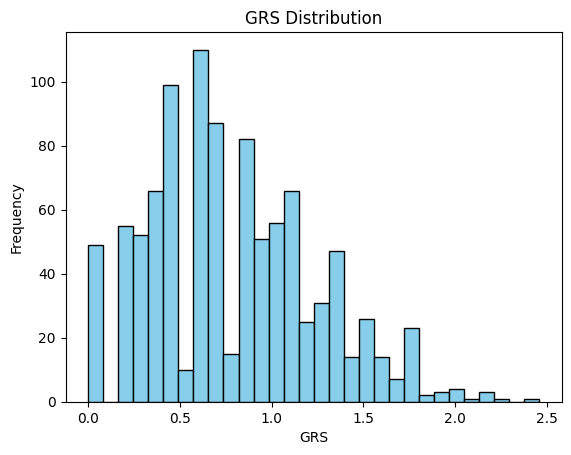

In [ ]:
#A histogram showing the distribution of the data
plt.hist(data['GRS'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('GRS')
plt.ylabel('Frequency')
plt.title('GRS Distribution')
plt.show()

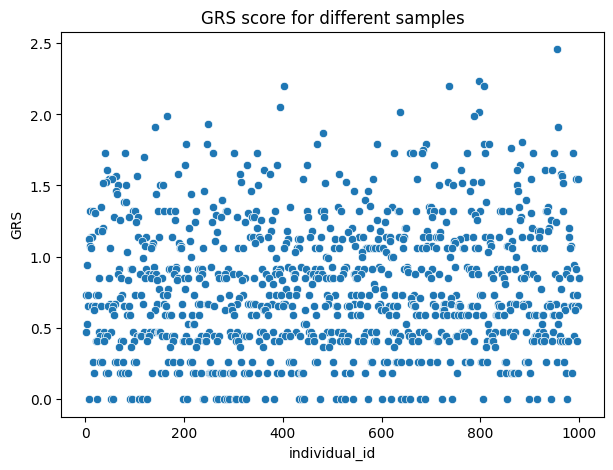

In [ ]:
#A scatter plot showing the distribution of the data
plt.figure(figsize=(7, 5))
sns.scatterplot(data = data, x = 'individual_id', y = 'GRS')
plt.xlabel('individual_id')
plt.ylabel('GRS')
plt.title("GRS score for different samples")
plt.show()

Graphing the whole data set with a line that separates the top 5% samples

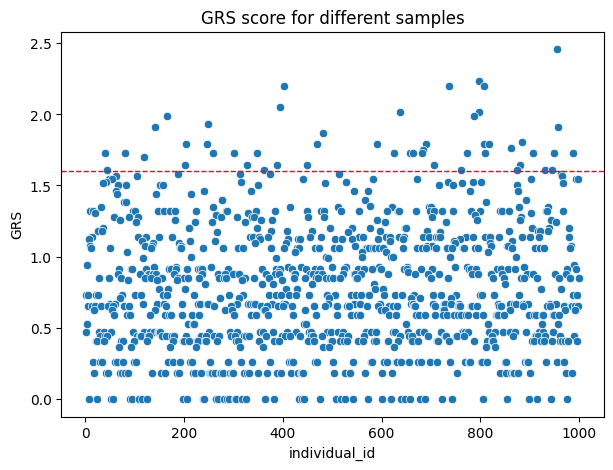

In [ ]:
#A scatter plot showing the distribution of the data
plt.figure(figsize=(7, 5))
sns.scatterplot(data = data, x = 'individual_id', y = 'GRS')
plt.axhline(1.6, color='red', linestyle='dashed',linewidth=1)
plt.xlabel('individual_id')
plt.ylabel('GRS')
plt.title("GRS score for different samples")
plt.show()

Merging the dataset with the SNPs

In [ ]:
data = Data.merge(data[['individual_id', 'GRS']], on='individual_id')
data.head()

,individual_id,rs13266634,rs1801282,rs4402960,rs5219,rs7903146,GRS
0,1,CA,AA,AA,TT,AA,0.470004
1,2,CA,GA,AA,TT,AA,0.732368
2,3,CC,AA,AA,TT,AA,0.940007
3,4,AA,GG,AA,TT,TT,0.524729
4,5,CA,AA,AA,AT,AA,0.652325


Graphing the data according to the SNPs to show the distribution of GRS and the different SNPs

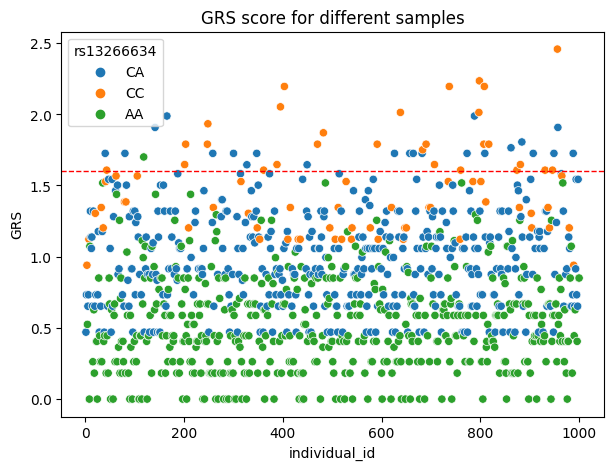

In [ ]:
#A scatter plot showing the distribution of the data
plt.figure(figsize=(7, 5))
sns.scatterplot(data = data, x = 'individual_id', y = 'GRS', hue = 'rs13266634')
plt.axhline(1.6, color='red', linestyle='dashed',linewidth=1)
plt.xlabel('individual_id')
plt.ylabel('GRS')
plt.title("GRS score for different samples")
plt.show()

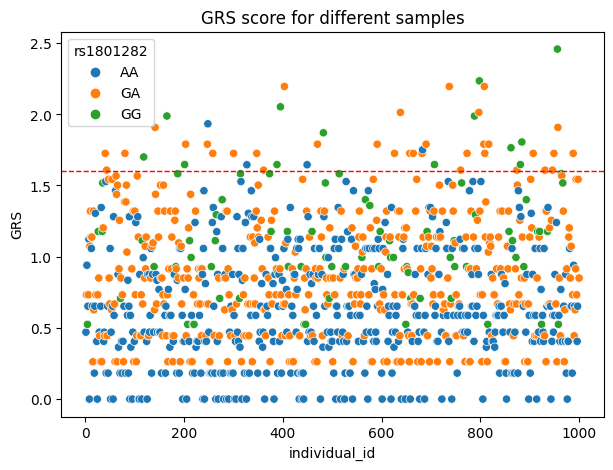

In [ ]:
#A scatter plot showing the distribution of the data
plt.figure(figsize=(7, 5))
sns.scatterplot(data = data, x = 'individual_id', y = 'GRS', hue = 'rs1801282')
plt.axhline(1.6, color='red', linestyle='dashed',linewidth=1)
plt.xlabel('individual_id')
plt.ylabel('GRS')
plt.title("GRS score for different samples")
plt.show()

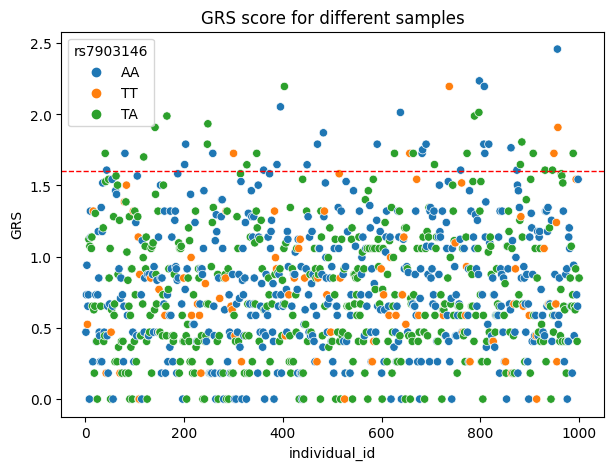

In [ ]:
#A scatter plot showing the distribution of the data
plt.figure(figsize=(7, 5))
sns.scatterplot(data = data, x = 'individual_id', y = 'GRS', hue = 'rs7903146')
plt.axhline(1.6, color='red', linestyle='dashed',linewidth=1)
plt.xlabel('individual_id')
plt.ylabel('GRS')
plt.title("GRS score for different samples")
plt.show()

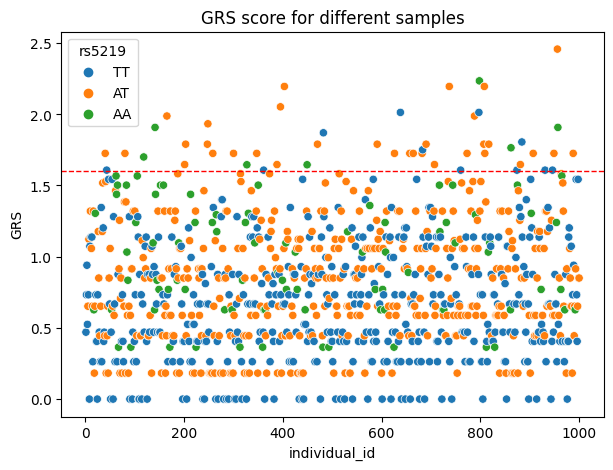

In [ ]:
#A scatter plot showing the distribution of the data
plt.figure(figsize=(7, 5))
sns.scatterplot(data = data, x = 'individual_id', y = 'GRS', hue = 'rs5219')
plt.axhline(1.6, color='red', linestyle='dashed',linewidth=1)
plt.xlabel('individual_id')
plt.ylabel('GRS')
plt.title("GRS score for different samples")
plt.show()

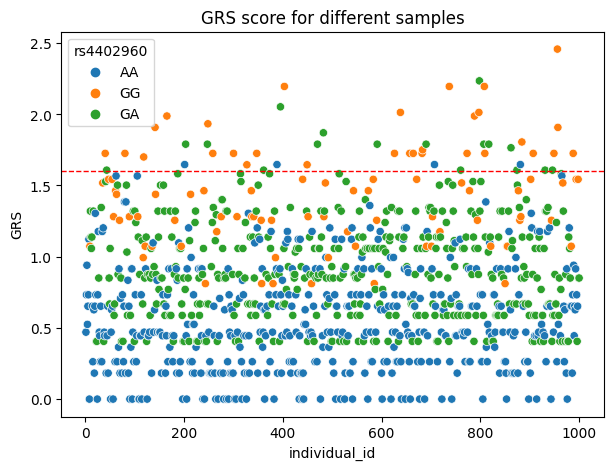

In [ ]:
#A scatter plot showing the distribution of the data
plt.figure(figsize=(7, 5))
sns.scatterplot(data = data, x = 'individual_id', y = 'GRS', hue = 'rs4402960')
plt.axhline(1.6, color='red', linestyle='dashed',linewidth=1)
plt.xlabel('individual_id')
plt.ylabel('GRS')
plt.title("GRS score for different samples")
plt.show()

#**Discussion**

from the figures above, the top 5% samples with the highest Genetic Risk Score (GRS) for Type 2 Diabetes (T2D) have more risk alleles than the other samples. For example, the sample with the highest GRS is monozygous with the risk alleles for these three SNPs (rs13266634, rs1801282, rs4402960) while having a single copy of the risk allele for the SNP (rs5219). The identification of risk alleles in different samples will allow for better treatment and prevention measures for each individual.

The GRS may have limitaions rising from the use of a single reference genome for example hg38. This single reference genome may lead to miss important SNPs or associate risk with wrong SNPs due to the underrepresntation of some populations. Using reference genomes like CHM13 -which has the complete sequence of the human genome- or a pangenome -which allow for better identification of mutations like inversions- will allow for better identification of risk alleles in different populations.

In conclusion, Using GRS for determining the risk of getting Type 2 Diabetes (T2D) is an approach with great potential. It will have better implications with the advancements of sequencing technology and the increase and diversification of the available genomic data.